<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

<center> <h1>Trabajo semanal 4 </h1></center>
    
<font color=darkblue size=3>*Facundo N. Iglesias*</font>

<img src="./rsc/consigna.png"  /> 

In [2]:
#LIbrerias utilizadas
from IPython.display import IFrame
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr
from numpy import sqrt
import numpy as np

import matplotlib.pyplot as plt
from pytc2.general import Chebyshev_polynomials 
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
import scipy.signal as sig

# Primera entrega


## Resolución

In [3]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

## Simulación numérica con analyse_sys

In [4]:
z,p,k = sig.buttap(3)
num_lp, den_lp = sig.zpk2tf(z,p,k)
eps = 0.51
plt.close('all')

### Simulación de transferencia pasa-bajos prototipo

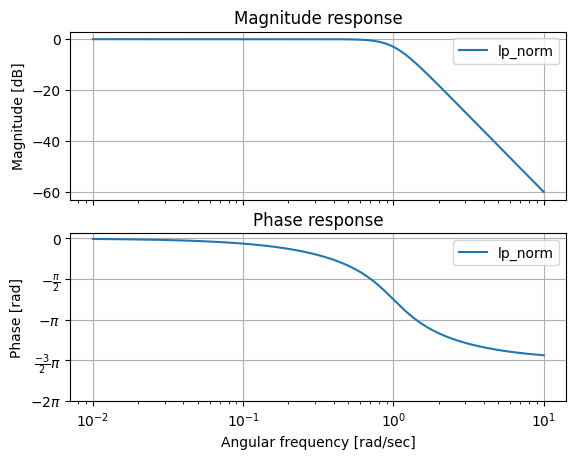

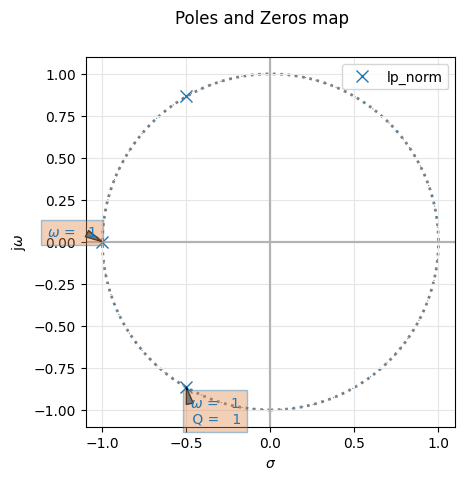

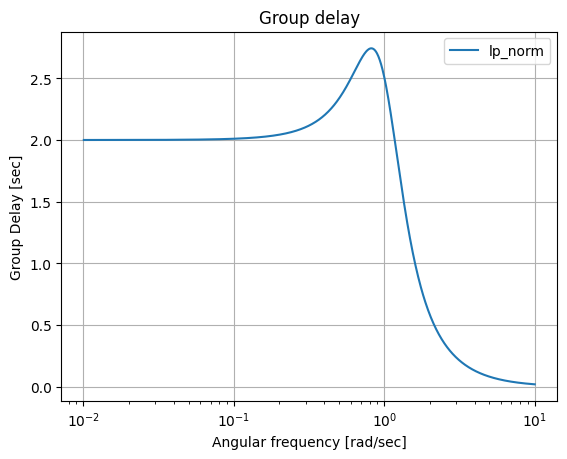

In [23]:
num_hp, den_hp = sig.lp2hp(num_lp, den_lp)
analyze_sys([sig.TransferFunction(num_lp, den_lp)], ['lp_norm'])

### Simulación de transferencia pasa-altos normalizada

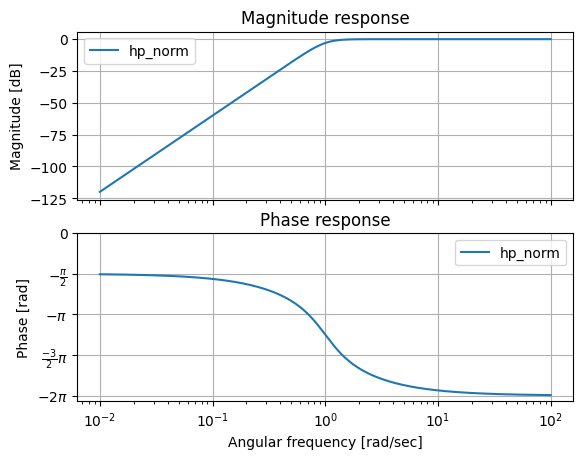

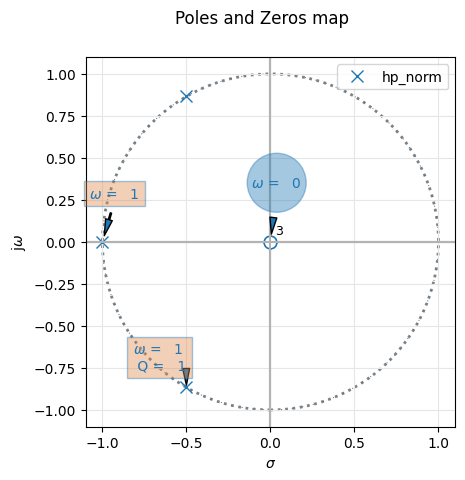

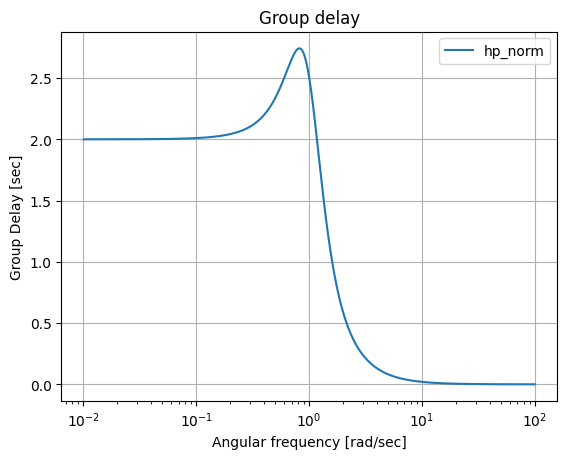

In [20]:
analyze_sys([sig.TransferFunction(num_hp, den_hp)], ['hp_norm'])

### Simulación de pasa-altos desnormalizado

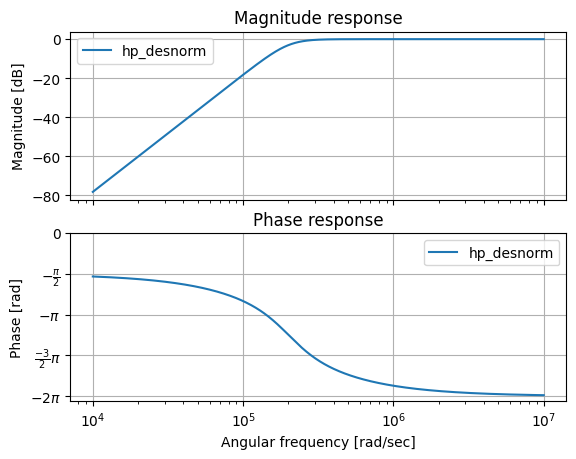

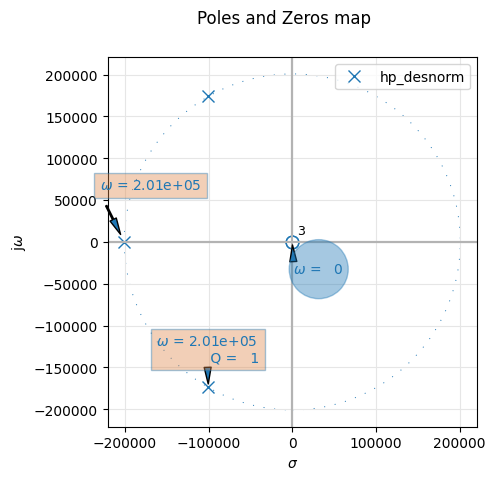

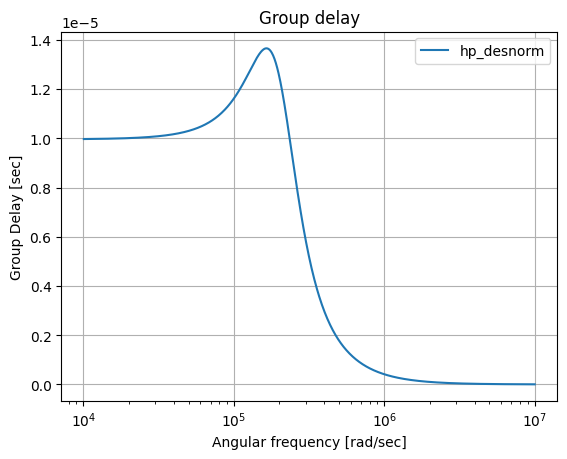

In [18]:
num_hp_d, den_hp_d = sig.lp2hp(num_lp,den_lp, 2*np.pi*40000*eps**(1/3) )
analyze_sys([sig.TransferFunction(num_hp_d,den_hp_d)], ['hp_desnorm'])

### Comparación de diagrama de polos y ceros

<img src="./rsc/pzmap_lp.png" align="left" width="400" height="400" /> 
<img src="./rsc/pzmap_hp.png" align="right" width="400" height="400" /> 

Se observa en el diagrama de polos y ceros de sendas transferencias como el cero triple que inicialmente se encuentra de forma implicita en el infinito en la transferencia del filtro pasa-bajos prototipo, luego de aplicar la transformación con el nucleo del pasa-altos el cero triple se traslada al origen. 

## Simulación de circuitos

### Simulación de pasa-altos normalizado
<img src="./rsc/sim/CircNorm1.png" align="left" width="1200" height="1200" /> 
En la simulación se puede observar que a la frecuencia de paso:
\begin{equation}
\omega_p = 1 \frac{rad}{s} \rightarrow f_s = 159 mHz
\end{equation}
La atenuación resulta de 3dB ya que la transferencia proviene de una normalización en frecuencia utilizando la frecuencia de Butterworth.

<img src="./rsc/sim/CircNorm2.png" align="left" width="1200" height="1200" /> 
La frecuencia en la banda suprimida es de:
\begin{equation}
\omega_s = \frac{1}{4} \rightarrow f_s = 40 mHz 
\end{equation}
En dicha frecuencia la atenuación es de 35 dB, siendo la minima solicitada por plantilla de 30 dB

### Simulación de circuito desnormalizado:
<img src="./rsc/sim/circDesnorm1.png" align="left" width="1200" height="1200" /> 
Luego de desnormalizar el circuito se observa que a la frecuencia de paso de 40 kHz la atenuación es de 0,975 dB, cumpliendo con lo solicitado:
\begin{equation}
\alpha_{max} = 1 dB
\end{equation}

<img src="./rsc/sim/circDesnorm2.png" align="left" width="1200" height="1200" /> 
En la banda de 10kHz la atenuación es de 30,1745 dB, cumpliendo marginalmente con lo requerido en la plantilla
\begin{equation}
\alpha_{min}= 30 dB
\end{equation}

--------------------------------------------------------------------------------------------------------------------